# Inheritance with ML

 We introuduced the concept of OOP in python and how it can be used to create a class.  We will also discuss how to create a class and how to use the class using inheritance.
 We will work just using Numpy to create a machine learning technique: **Linear Regression.**

In [1]:
import numpy as np
import pandas as pd

A very simple class *MyLinearRegression* that implements the linear regression.

You have to implement the following inside the class in **__init__ method.**
arguments:\

**fit_intercept**:  boolean, optional, default True, specifies if a constant (a.k.a. bias or intercept) should be
                    added to the decision function.

Attributes:
**coefficients**:   with a value of None: array of shape (n_features), are the estimated coefficients for the linear regression problem.

**intercept**:      with a value of None: float, is the estimated intercept (a.k.a. bias) for the linear regression problem.

finally you have to call the **fit_intercept** attribute as a *private attribute*. i.e. this is a attribute that is not accessible outside the class to the user of the class.

In [5]:
class MyLinearRegression:
    def __init__(self, fit_intercept= True):
        self.coefficients = None
        self.intercept = None
        self._fit_intercept = fit_intercept

    def __str__(self):
        return "I am a Linear Regression model"


#### Create an instance and check attributes

#### Built-in description method
We can add a special built-in method __str__ to create a short description string which returns the string " I am a linear regression model"

In [6]:
mylinreg = MyLinearRegression()

Now that you have created the class, test if the instance you create returns the string " I am a linear regression model" by running the following code.

In [7]:
print(mylinreg)  # replace with your instance of MyLinearRegression

I am a Linear Regression model


#### Adding the fit method
Now, we can add the core fitting method called fit. This uses linear algebra routines from NumPy to solve a linear regression (single or multi-variate) problem.

In [46]:
class MyLinearRegression:
    
    def __init__(self,fit_intercept= True):
        self.coefficients = None
        self.intercept = None
        self._fit_intercept = fit_intercept
    
    def __str__(self):
        return "I am a Linear Regression model"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        # YOUR CODE HERE
        if len(X.shape) == 1:
            X = X.reshape(-1,1)

        # Assign X and y to two new attributes
        # YOUR CODE HERE
        self.X = X
        self.y= y
        
            
        # adding bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(self.X.shape[0]), self.X]#
        else:
            X_biased = self.X
        
        
        # closed form solution, i will give you the code for now
        
        
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, self.y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes from the init function
        if self._fit_intercept:
            # delete the pass statement
            # intercept attribute
            self.intercept_ = coef[0]
            
            # coef attribute
            self.coef_ = coef[1:]
        else:
            # delete the pass statement
            # intercept attribute
            self.intercept_= 0
            
            # coef attribute
            self.coef_ = coef
            

Generate some random data for test

In [47]:
X = 10*np.random.random(size=(20,2))
y = 3.5*X.T[0]-1.2*X.T[1]+2*np.random.randn(20)

In [48]:
import matplotlib.pyplot as plt

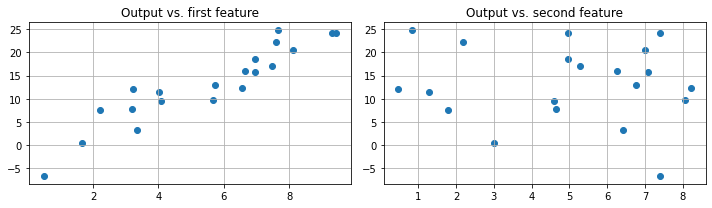

In [49]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

ax[0].scatter(X.T[0],y)
ax[0].set_title("Output vs. first feature")
ax[0].grid(True)
ax[1].scatter(X.T[1],y)
ax[1].set_title("Output vs. second feature")
ax[1].grid(True)
fig.tight_layout()
plt.show()

Instantiate a new MyLinearRegression object and fit the data

In [50]:
# instantiate 
mylinreg = MyLinearRegression()

In [51]:
#fit the data
mylinreg.fit(X,y)

In [52]:
# print the coefficients
print("Regression coefficients: ", mylinreg.coef_)

Regression coefficients:  [ 3.27383833 -1.14192334]


In [53]:
# print the intercept
print(mylinreg.intercept_)

0.7522014351267643



Comparison of ground truth and fitted values
Woudn't it be nice to compare the ground truth with the predictions and see how closely they fit

In [54]:
#unccomment the following line to see the plot
coef_ = mylinreg.coef_  # replace mlr with your instance
y_pred = np.dot(X,coef_)+mylinreg.intercept_  # replace mlr with your instance

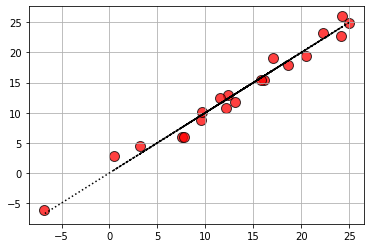

In [55]:
##uncomment the following to see the plot
plt.scatter(y,y_pred,s=100,alpha=0.75,color='red',edgecolor='k')
plt.plot(y,y,c='k',linestyle='dotted')
plt.grid(True)
plt.show()


**Encapsulation**
But we don't want to write stand-alone code. Can we encapsulate the code inside the class?

In [56]:
class MyLinearRegression:
    
    def __init__(self,fit_intercept= True):
        self.coefficients = None
        self.intercept = None
        self._fit_intercept = fit_intercept
    
    def __str__(self):
        return "I am a Linear Regression model"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        # YOUR CODE HERE
        if len(X.shape) == 1:
            X = X.reshape(-1,1)

        # Assign X and y to two new attributes
        # YOUR CODE HERE
        self.X = X
        self.y= y
        
            
        # adding bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(self.X.shape[0]), self.X]#
        else:
            X_biased = self.X
        
        
        # closed form solution, i will give you the code for now
        
        
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, self.y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes from the init function
        if self._fit_intercept:
            # delete the pass statement
            # intercept attribute
            self.intercept_ = coef[0]
            
            # coef attribute
            self.coef_ = coef[1:]
        else:
            # delete the pass statement
            # intercept attribute
            self.intercept_= 0
            
            # coef attribute
            self.coef_ = coef
            
        # add the fitted values to the instance, i.e the predicted values seen ealier
        # the y_pred formulat and assign it to self.fitted 
    
    # create a method to plot the data and the fitted line
    def plot_fitted(self,reference_line=False):
        """
        Plots fitted values against the true output values from the data
        
        Arguments:
        reference_line: A Boolean switch to draw a 45-degree reference line on the plot
        """
        
        # title of the plot
        plt.title("True vs fitted values", fontsize = 14)
      
        
        # plot the data scatter graph
        plt.scatter(y.self.fitted_, s=100, alpha=0.75, color='blue', edgecolor='k')
        
        
        # plot the reference line if required
        if reference_line:
        # delete the pass statement
        # set the x and y labels of the plot 
            plt.plot(y,y,c='k', linestyle='dotted')
        plt.xlabel("True values")
        plt.ylabel("Fitted values")
        plt.grid(True)
    
        # show the plot
        plt.show()
        
            

#### Demo the new plot_fitted method
Now the MyLinearRegression class has the ability (aka methods) to both fit the data and visualize the fitted/true output values in a plot

In [66]:
# A fresh instance

# Fitting with the data


In [65]:
# Call the 'plot_fitted' method


In [10]:
# We can pass on a switch 'reference_line' to draw a 45-degree reference line on the plot

##  Adding a predict method
Now, we want to extend the functionality and add a predict method to enable the class to predict for any arbitrary new dataset

#### Re-write the class and add the predict method provide below replacing the intercept and coefficient values with those specified in your class

def predict(self, X):
        """Output model prediction.

        Arguments:
        X: 1D or 2D numpy array
        """
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        self.predicted_ = self.intercept_ + np.dot(X, self.coef_)  #change attr here
        
        return self.predicted_

### Metrics class
We could have added a whole bunch of methods directly into the MyLinearRegression class. But, instead, we will show the power of inheritance and define a separate class Metrics for computing common metrics of a regression model.

Note, this class has no __init__ method because we will never instantiate an object using this class. Rather, we will sort of absorb this class into the MyLinearRegression class.

def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.resid_) ** 2
        self.sq_error_ = np.sum(squared_errors)
        return self.sq_error_
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.y)
        squared_errors = (self.y - avg_y) ** 2
        self.sst_ = np.sum(squared_errors)
        return self.sst_
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        self.r_sq_ = 1 - self.sse()/self.sst()
        return self.r_sq_

    
    def mse(self):
        '''returns calculated value of mse'''
        self.mse_ = np.mean( (self.predict(self.X) - self.y) ** 2 )
        return self.mse_
    
    def pretty_print_stats(self):
        '''returns report of statistics for a given model object'''
        items = ( ('sse:', self.sse()), ('sst:', self.sst()), 
                 ('mse:', self.mse()), ('r^2:', self.r_squared()), 
                  )
        for item in items:
            print('{0:8} {1:.4f}'.format(item[0], item[1]))

Use the above functions and wrap in a class called Metrics.

#### Class with inheritance
Now we inherit the Metrics class in the MyLinearRegression class by passing on Metrics in the very defination of the MyLinearRegression class.

We also need to add a new attribute - resid_. These are the residuals (the difference between the fitted values and true target_/output values), which are used by the methods in the Metrics perform the necessary computations.

Add the attribute resid_ to the MyLinearRegression class after the fitted attribute that we had added earlier.

In [12]:
# inherited class here


In [14]:
#Demo the newly acquired power of MyLinearRegression - the metrics

# create an instance of MyLinearRegression

# fit the data

In [15]:
# call sse() method

In [16]:
# call mse() method

In [17]:
# call pretty_print() method

You have successfully completed the following:
- Created a class called MyLinearRegression
- Created a class called Metrics
- Inherited the Metrics class in the MyLinearRegression class